# 7.7 Applications to Polymers


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interactive

Model a polymer of length $N$ as chain on a rectangular lattice.

In [211]:
def walker2D(N = 100, # number of steps
           x0 = 0, # initial position
           y0 = 0, 
           a = 1, # step size
          ):
    
    xAccum = np.zeros(N)
    xSquaredAccum = np.zeros(N)
    yAccum = np.zeros(N)
    ySquaredAccum = np.zeros(N)
    
    x = x0
    y = y0
    for n in range(1,N):

        
        r = np.random.rand()
        if r < 0.25:
            x += a
        elif r < 0.50:
            x -= a
        elif r < 0.75:
            y += a
        else:
            y -= a
        
        xAccum[n] = x
        xSquaredAccum[n] = x*x
        
        yAccum[n] = y
        ySquaredAccum[n] = y*y
        
    return {'xAccum': xAccum,
            'xSquaredAccum': xSquaredAccum,
            'yAccum': yAccum,
            'ySquaredAccum': ySquaredAccum,
            }

In [216]:
def run_trials(trials=10, N=20):

    rows = []
    for t in range(trials):
        row = walker2D(N=N)
        rows.append(row)

    df = pd.DataFrame(rows)
    df.trials = trials
    df.N = N
    
    return df

In [217]:
def plot_xy(df):
    trials = len(df)
    for t in range(trials):
        walk = df.iloc[t]
        plt.plot(walk.xAccum, walk.yAccum,'k-', linewidth=0.1)

    plt.xlabel('step')
    plt.ylabel('<x>')

In [247]:
def compute_R(df):
    Δx2 = df.xSquaredAccum.mean()[-1] - df.xAccum.mean()[-1]**2
    Δy2 = df.ySquaredAccum.mean()[-1] - df.yAccum.mean()[-1]**2
    R2 = Δx2 + Δy2
    R = np.sqrt(R2)
    
    return R

In [251]:
df = run_trials(N=8, trials=1000)
compute_R(df)

2.6356687955811138

In [228]:
df = run_trials(N=8, trials=1000)

(-6.55, 5.55, -5.55, 6.55)

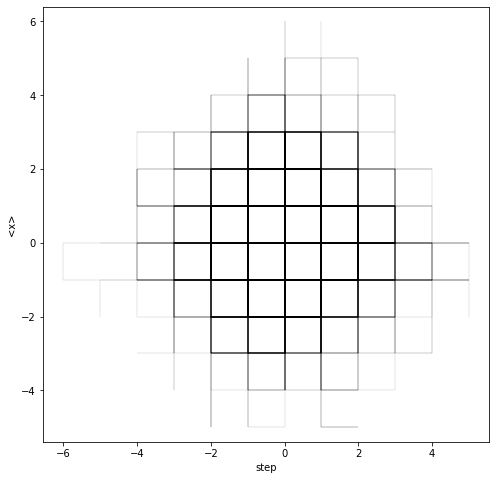

In [252]:
plt.figure(figsize=(8,8))

plot_xy(df)
plt.axis('equal')

In [260]:
rows = []
for N in [8, 16, 32, 64, 128]:
    df = run_trials(N=N, trials=1000)
    
    R = compute_R(df)
    
    row = {'N':N, 'R': R}
    rows.append(row)
df = pd.DataFrame(rows)

In [261]:
df

,N,R
0,8,2.609558
1,16,3.884689
2,32,5.429722
3,64,7.926663
4,128,10.955859


Text(0.5, 1.0, 'ν = 0.5168565177462473')

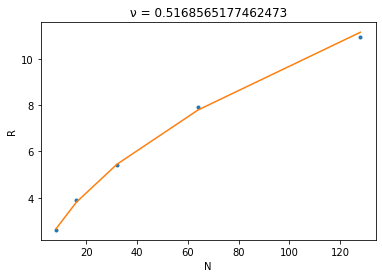

In [269]:
ν, C = np.polyfit(np.log(df.N), np.log(df.R), 1)
R_fit = df.N**ν*np.exp(C)

plt.plot(df.N, df.R, '.')
plt.plot(df.N, R_fit, '-')

plt.xlabel('N')
plt.ylabel('R')
plt.title(f'ν = {ν}')

## Self-avoiding walk

Problem 7.28

In [270]:
def SAW_2D(N = 100, # number of steps
           x0 = 0, # initial position
           y0 = 0, 
           a = 1, # step size
          ):
    
    xAccum = np.zeros(N)*np.nan
    xSquaredAccum = np.zeros(N)*np.nan
    yAccum = np.zeros(N)*np.nan
    ySquaredAccum = np.zeros(N)*np.nan
    
    x = x0
    y = y0
    
    previous_direction = ''
    direction = 'U'
    
    for n in range(N):
    
        # record the previous move
        xAccum[n] = x
        xSquaredAccum[n] = x*x
        
        yAccum[n] = y
        ySquaredAccum[n] = y*y
        
        # randomly choose a direction that is not the previous direction
        while direction==previous_direction:
            r = np.random.rand()

            if r < 0.25:
                direction = 'U'
            elif r < 0.50:
                direction = 'D'
            elif r < 0.75:
                direction = 'R'
            else:
                direction = 'L'

        # now that we have chosen a 'new' direction, make the move
        if direction=='U':
            y += a
        elif direction=='D':
            y -= a
        elif direction=='R':
            x += a
        elif direction=='L':
            x -= a

        # check if that move would be invalid
        valid = True
        for i in range(n):
            if x==xAccum[i] and y==yAccum[i]:
                valid = False
                break
        if not valid:
            break

        previous_direction=direction
        
    return {'valid': valid,
            'xAccum': xAccum,
            'yAccum': yAccum,
            'xSquaredAccum': xSquaredAccum,
            'ySquaredAccum': ySquaredAccum,
            }

In [271]:
def run_trials(trials=10, N=20):

    rows = []
    for t in range(trials):
        row = SAW_2D(N=N)
        # only keep completed chains
        if row['valid']:
            rows.append(row)

    df = pd.DataFrame(rows)
    df.trials = trials
    df.N = N
    
    return df

In [280]:
rows = []
for N in range(1,20):
    trials = 100000
    df = run_trials(trials=trials, N=N)
    R = compute_R(df)
    N_valid = len(df)
    row = {'N': N,
           'N_valid' : N_valid,
           'f': N_valid / trials,
           'R': R}
    rows.append(row)
df = pd.DataFrame(rows)
           
df
    

AttributeError: 'DataFrame' object has no attribute 'xSquaredAccum'

In [276]:
rows = []
for N in [4,5,6,7,8]:
    df = run_trials(N=N, trials=1000)
    
    R = compute_R(df)
    
    row = {'N':N, 
           'R': R}
    rows.append(row)
df = pd.DataFrame(rows)

In [277]:
df

,N,R
0,4,1.369599
1,5,2.012177
2,6,2.396998
3,7,2.965196
4,8,3.209155
